Working notebook used for data exploration. Not necessarily part of the method.

In [7]:
import geopandas as gpd
import pandas as pd
import seaborn as sns

In [8]:
sns.set(context="paper", style='whitegrid')

In [3]:
lsoa = gpd.read_file("../../data/lsoa_clustered.gpkg", driver="GPKG")

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:565: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [21]:
for n in [7, 10, 12]:
    print(f"With {n} clusters {round((lsoa[[c for c in lsoa.columns if f'clusters_{n}' in c]].nunique(axis=1) > 1).sum() / lsoa.shape[0] * 100, 3)}% of LSOAs change cluster at least once.")

With 7 clusters 20.674% of LSOAs change cluster at least once.
With 10 clusters 26.303% of LSOAs change cluster at least once.
With 12 clusters 27.966% of LSOAs change cluster at least once.


In [22]:
for n in [7, 10, 12]:
    print(f"With {n} clusters {round((lsoa[[c for c in lsoa.columns if f'clusters_{n}' in c]].nunique(axis=1) > 2).sum() / lsoa.shape[0] * 100, 3)}% of LSOAs change cluster at least twice.")

With 7 clusters 1.062% of LSOAs change cluster at least twice.
With 10 clusters 1.729% of LSOAs change cluster at least twice.
With 12 clusters 2.089% of LSOAs change cluster at least twice.


In [24]:
for n in [7, 10, 12]:
    print(f"With {n} clusters {round((lsoa[[c for c in lsoa.columns if f'clusters_{n}' in c]].nunique(axis=1) > 3).sum() / lsoa.shape[0] * 100, 3)}% of LSOAs change cluster everytime.")

With 7 clusters 0.017% of LSOAs change cluster everytime.
With 10 clusters 0.032% of LSOAs change cluster everytime.
With 12 clusters 0.037% of LSOAs change cluster everytime.


In [26]:
lsoa_clc2000 = gpd.read_parquet("../../data/clustering_phase_1/lsoa_clc2000.pq")
lsoa_clc2006 = gpd.read_parquet("../../data/clustering_phase_1/lsoa_clc2006.pq")
lsoa_clc2012 = gpd.read_parquet("../../data/clustering_phase_1/lsoa_clc2012.pq")
lsoa_clc2018 = gpd.read_parquet("../../data/clustering_phase_1/lsoa_clc2018.pq")

In [27]:
data = pd.concat([lsoa_clc2000, lsoa_clc2006, lsoa_clc2012, lsoa_clc2018], axis=0).drop(columns='geometry')

In [28]:
lsoa.columns

Index(['OBJECTID', 'LSOA11CD', 'LSOA11NM', 'BNG_E', 'BNG_N', 'LONG_', 'LAT',
       'Shape_Leng', 'Shape__Are', 'Shape__Len', 'clusters_7_2000',
       'clusters_7_2006', 'clusters_7_2012', 'clusters_7_2018',
       'clusters_10_2000', 'clusters_10_2006', 'clusters_10_2012',
       'clusters_10_2018', 'clusters_12_2000', 'clusters_12_2006',
       'clusters_12_2012', 'clusters_12_2018', 'geometry'],
      dtype='object')

In [31]:
means7 = data.groupby(pd.concat([lsoa.clusters_7_2000, lsoa.clusters_7_2006, lsoa.clusters_7_2012, lsoa.clusters_7_2018])).mean()
means10 = data.groupby(pd.concat([lsoa.clusters_10_2000, lsoa.clusters_10_2006, lsoa.clusters_10_2012, lsoa.clusters_10_2018])).mean()
means12 = data.groupby(pd.concat([lsoa.clusters_12_2000, lsoa.clusters_12_2006, lsoa.clusters_12_2012, lsoa.clusters_12_2018])).mean()

In [30]:
means7

,land_cover_111,land_cover_112,land_cover_121,land_cover_122,land_cover_123,land_cover_124,land_cover_131,land_cover_132,land_cover_133,land_cover_141,...,land_cover_421,land_cover_423,land_cover_511,land_cover_512,land_cover_521,land_cover_522,land_cover_523,land_cover_422,land_cover_334,land_cover_244
0,0.006628,0.255756,0.022531,0.004985,0.021593,0.006986,0.009188,0.001623,0.005313,0.068508,...,0.004293,0.002865,0.000128,0.009471,0.000003,0.000367,0.000394,0.0,0.0,0.000000
1,0.773586,0.191048,0.012118,0.000634,0.004043,0.000000,0.000000,0.000000,0.000521,0.009492,...,0.000002,0.001612,0.000251,0.000104,0.000000,0.000184,0.000104,0.0,0.0,0.000000
2,0.000831,0.173248,0.012362,0.001153,0.000279,0.001429,0.003746,0.000438,0.000947,0.002017,...,0.001822,0.001097,0.000051,0.002613,0.000053,0.000226,0.000132,0.0,0.0,0.000000
3,0.000248,0.119675,0.011415,0.001072,0.000239,0.002649,0.003741,0.000902,0.001150,0.001136,...,0.001550,0.000781,0.000098,0.002486,0.000008,0.000115,0.000106,0.0,0.0,0.000003
4,0.027423,0.643957,0.029362,0.002830,0.002304,0.000765,0.001184,0.000177,0.001292,0.085251,...,0.000483,0.001059,0.000147,0.001845,0.000002,0.000219,0.000216,0.0,0.0,0.000000
5,0.003727,0.967354,0.004527,0.000358,0.000249,0.000083,0.000057,0.000010,0.000109,0.005268,...,0.000029,0.000341,0.000071,0.000078,0.000001,0.000114,0.000092,0.0,0.0,0.000000
6,0.017724,0.326572,0.522853,0.002974,0.007751,0.002189,0.000835,0.000593,0.001988,0.032431,...,0.000932,0.000582,0.000251,0.002315,0.000000,0.000514,0.000200,0.0,0.0,0.000000


In [33]:
legend = pd.read_csv("../../data/clc/2018/u2018_clc2018_v2020_20u1_geoPackage/Legend/CLC_legend.csv", sep=";")

In [35]:
legend = legend.set_index("CLC_CODE")

In [37]:
legend.LABEL3

CLC_CODE
111                              Continuous urban fabric
112                           Discontinuous urban fabric
121                       Industrial or commercial units
122           Road and rail networks and associated land
123                                           Port areas
124                                             Airports
131                             Mineral extraction sites
132                                           Dump sites
133                                   Construction sites
141                                    Green urban areas
142                         Sport and leisure facilities
211                            Non-irrigated arable land
212                           Permanently irrigated land
213                                          Rice fields
221                                            Vineyards
222                    Fruit trees and berry plantations
223                                         Olive groves
231                   

In [43]:
rename = {}
for c in means7.columns:
    rename[c] = legend.LABEL3[int(c[-3:])]

In [45]:
means7 = means7.rename(columns=rename)
means7

,Continuous urban fabric,Discontinuous urban fabric,Industrial or commercial units,Road and rail networks and associated land,Port areas,Airports,Mineral extraction sites,Dump sites,Construction sites,Green urban areas,...,Salt marshes,Intertidal flats,Water courses,Water bodies,Coastal lagoons,Estuaries,Sea and ocean,Salines,Burnt areas,Agro-forestry areas
0,0.006628,0.255756,0.022531,0.004985,0.021593,0.006986,0.009188,0.001623,0.005313,0.068508,...,0.004293,0.002865,0.000128,0.009471,0.000003,0.000367,0.000394,0.0,0.0,0.000000
1,0.773586,0.191048,0.012118,0.000634,0.004043,0.000000,0.000000,0.000000,0.000521,0.009492,...,0.000002,0.001612,0.000251,0.000104,0.000000,0.000184,0.000104,0.0,0.0,0.000000
2,0.000831,0.173248,0.012362,0.001153,0.000279,0.001429,0.003746,0.000438,0.000947,0.002017,...,0.001822,0.001097,0.000051,0.002613,0.000053,0.000226,0.000132,0.0,0.0,0.000000
3,0.000248,0.119675,0.011415,0.001072,0.000239,0.002649,0.003741,0.000902,0.001150,0.001136,...,0.001550,0.000781,0.000098,0.002486,0.000008,0.000115,0.000106,0.0,0.0,0.000003
4,0.027423,0.643957,0.029362,0.002830,0.002304,0.000765,0.001184,0.000177,0.001292,0.085251,...,0.000483,0.001059,0.000147,0.001845,0.000002,0.000219,0.000216,0.0,0.0,0.000000
5,0.003727,0.967354,0.004527,0.000358,0.000249,0.000083,0.000057,0.000010,0.000109,0.005268,...,0.000029,0.000341,0.000071,0.000078,0.000001,0.000114,0.000092,0.0,0.0,0.000000
6,0.017724,0.326572,0.522853,0.002974,0.007751,0.002189,0.000835,0.000593,0.001988,0.032431,...,0.000932,0.000582,0.000251,0.002315,0.000000,0.000514,0.000200,0.0,0.0,0.000000


In [46]:
means10 = means10.rename(columns=rename)
means10

,Continuous urban fabric,Discontinuous urban fabric,Industrial or commercial units,Road and rail networks and associated land,Port areas,Airports,Mineral extraction sites,Dump sites,Construction sites,Green urban areas,...,Salt marshes,Intertidal flats,Water courses,Water bodies,Coastal lagoons,Estuaries,Sea and ocean,Salines,Burnt areas,Agro-forestry areas
0,0.774174,0.190823,0.012236,0.000635,0.004050,0.000000,0.000000,0.000000,0.000522,0.008885,...,0.000002,0.001615,0.000251,0.000104,0.000000,0.000184,0.000105,0.0,0.0,0.000000
1,0.002926,0.972634,0.003581,0.000311,0.000203,0.000083,0.000042,0.000006,0.000096,0.005626,...,0.000029,0.000309,0.000067,0.000079,0.000000,0.000107,0.000091,0.0,0.0,0.000000
2,0.000215,0.075681,0.010014,0.000958,0.000224,0.003008,0.003664,0.000842,0.001097,0.000476,...,0.001837,0.000694,0.000122,0.002269,0.000009,0.000099,0.000085,0.0,0.0,0.000006
3,0.037263,0.688829,0.038538,0.003426,0.002610,0.000808,0.001252,0.000154,0.001355,0.019189,...,0.000615,0.001207,0.000157,0.001766,0.000007,0.000245,0.000255,0.0,0.0,0.000000
4,0.004097,0.255711,0.021039,0.004895,0.025962,0.007320,0.009590,0.001399,0.005591,0.011267,...,0.004375,0.003344,0.000119,0.009679,0.000004,0.000413,0.000414,0.0,0.0,0.000000
5,0.001023,0.194917,0.012810,0.001210,0.000275,0.001353,0.003686,0.000303,0.000890,0.002273,...,0.002027,0.001160,0.000037,0.002407,0.000063,0.000231,0.000129,0.0,0.0,0.000000
6,0.008894,0.527499,0.018815,0.001729,0.001171,0.000241,0.000391,0.000415,0.000382,0.406845,...,0.000019,0.000349,0.000173,0.002638,0.000000,0.000062,0.000073,0.0,0.0,0.000000
7,0.000123,0.075750,0.012648,0.001480,0.000280,0.003203,0.004678,0.001171,0.001379,0.000934,...,0.001912,0.000911,0.000086,0.003918,0.000009,0.000189,0.000170,0.0,0.0,0.000000
8,0.018299,0.322687,0.532394,0.003042,0.008023,0.002306,0.000949,0.000619,0.002080,0.027492,...,0.000982,0.000608,0.000251,0.002458,0.000000,0.000534,0.000209,0.0,0.0,0.000000
9,0.001032,0.454735,0.016897,0.001145,0.000580,0.000933,0.002928,0.000743,0.001964,0.005056,...,0.000370,0.001009,0.000074,0.001623,0.000000,0.000210,0.000132,0.0,0.0,0.000000


In [47]:
means12 = means12.rename(columns=rename)
means12

,Continuous urban fabric,Discontinuous urban fabric,Industrial or commercial units,Road and rail networks and associated land,Port areas,Airports,Mineral extraction sites,Dump sites,Construction sites,Green urban areas,...,Salt marshes,Intertidal flats,Water courses,Water bodies,Coastal lagoons,Estuaries,Sea and ocean,Salines,Burnt areas,Agro-forestry areas
0,0.009478,0.513361,0.020361,0.002169,0.001163,0.000260,0.000470,0.000363,0.000394,0.419085,...,0.000020,0.000378,0.000187,0.002902,0.000000,0.000067,0.000055,0.0,0.0,0.000000
1,0.002370,0.494052,0.010993,0.001042,0.000396,0.000613,0.001639,0.000181,0.000835,0.005524,...,0.000975,0.000773,0.000054,0.001712,0.000011,0.000169,0.000175,0.0,0.0,0.000000
2,0.003978,0.178959,0.021642,0.005372,0.035216,0.010441,0.014052,0.002041,0.007640,0.006695,...,0.005880,0.003098,0.000092,0.011648,0.000005,0.000433,0.000507,0.0,0.0,0.000000
3,0.000217,0.074236,0.009703,0.000956,0.000213,0.003055,0.003658,0.000859,0.001115,0.000428,...,0.001689,0.000699,0.000117,0.002252,0.000010,0.000099,0.000086,0.0,0.0,0.000006
4,0.772865,0.192465,0.012240,0.000633,0.003716,0.000000,0.000000,0.000000,0.000520,0.008849,...,0.000002,0.001608,0.000250,0.000103,0.000000,0.000183,0.000103,0.0,0.0,0.000000
5,0.002133,0.979190,0.002649,0.000250,0.000187,0.000047,0.000026,0.000003,0.000063,0.003771,...,0.000028,0.000269,0.000059,0.000064,0.000000,0.000094,0.000090,0.0,0.0,0.000000
6,0.018738,0.324462,0.531822,0.003039,0.007711,0.002444,0.000809,0.000618,0.002049,0.027470,...,0.000963,0.000596,0.000251,0.002623,0.000000,0.000580,0.000208,0.0,0.0,0.000000
7,0.001050,0.449794,0.017396,0.001123,0.000597,0.000903,0.002950,0.000748,0.002041,0.005131,...,0.000525,0.001027,0.000098,0.001582,0.000000,0.000216,0.000134,0.0,0.0,0.000000
8,0.041074,0.731992,0.041840,0.003759,0.002925,0.001064,0.001254,0.000205,0.001422,0.031310,...,0.000618,0.001338,0.000178,0.001874,0.000008,0.000271,0.000250,0.0,0.0,0.000000
9,0.000415,0.111565,0.012612,0.001077,0.000187,0.001203,0.003852,0.000305,0.000865,0.001381,...,0.002182,0.001255,0.000026,0.002213,0.000081,0.000209,0.000118,0.0,0.0,0.000000


In [48]:
means7.to_csv('means7.csv')
means10.to_csv('means10.csv')
means12.to_csv('means12.csv')

In [6]:
lsoa.columns

Index(['OBJECTID', 'LSOA11CD', 'LSOA11NM', 'BNG_E', 'BNG_N', 'LONG_', 'LAT',
       'Shape_Leng', 'Shape__Are', 'Shape__Len', 'clusters_7_2000',
       'clusters_7_2006', 'clusters_7_2012', 'clusters_7_2018',
       'clusters_10_2000', 'clusters_10_2006', 'clusters_10_2012',
       'clusters_10_2018', 'clusters_12_2000', 'clusters_12_2006',
       'clusters_12_2012', 'clusters_12_2018', 'geometry'],
      dtype='object')

(376281.0, 406281.0)

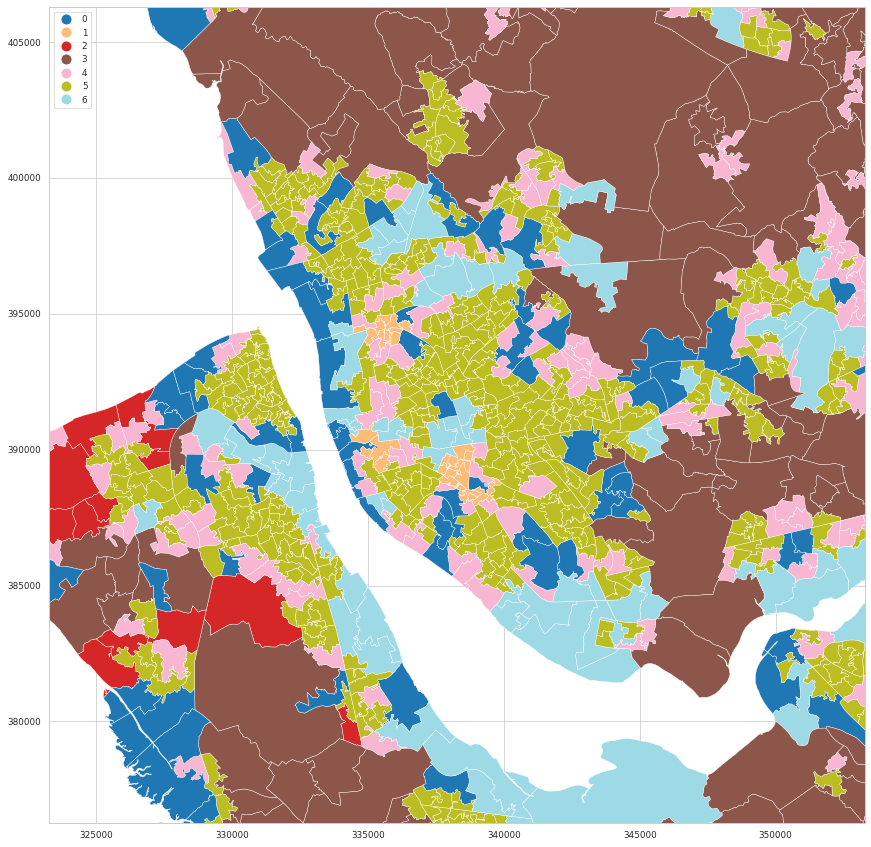

In [17]:
ax = lsoa.plot("clusters_7_2018", categorical=True, figsize=(15, 15), legend=True, alpha=1, cmap='tab20', linewidth=.4, legend_kwds=dict(loc="upper left"))
ax.set_xlim(323275, 353275)
ax.set_ylim(376281, 406281)

(376281.0, 406281.0)

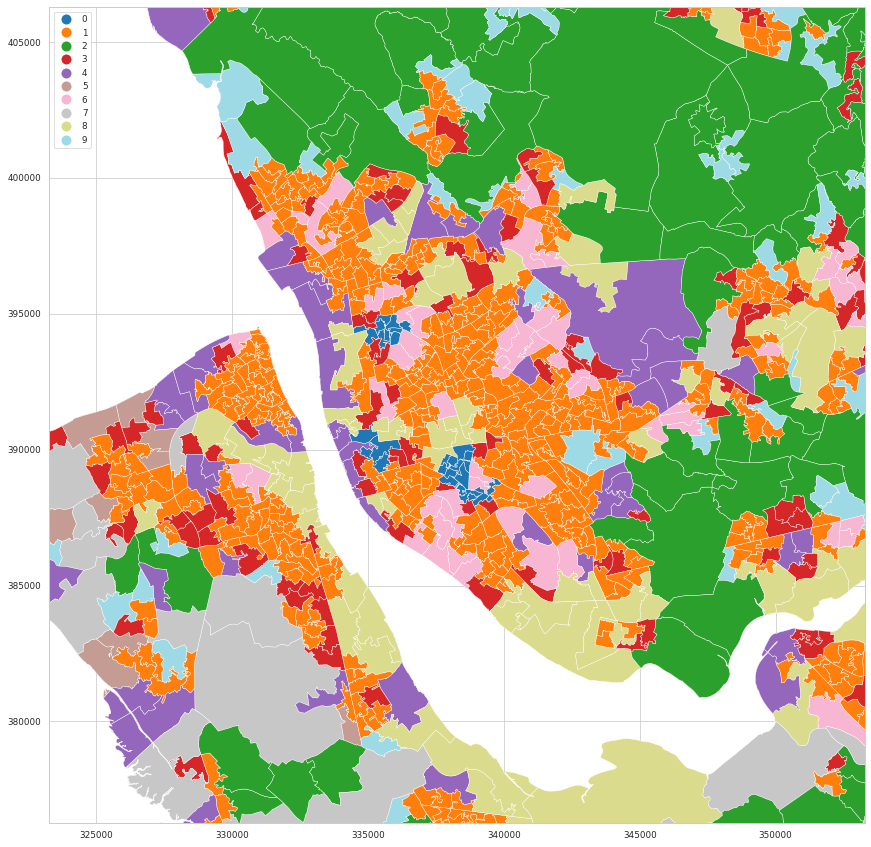

In [18]:
ax = lsoa.plot("clusters_10_2018", categorical=True, figsize=(15, 15), legend=True, alpha=1, cmap='tab20', linewidth=.4, legend_kwds=dict(loc="upper left"))
ax.set_xlim(323275, 353275)
ax.set_ylim(376281, 406281)

(376281.0, 406281.0)

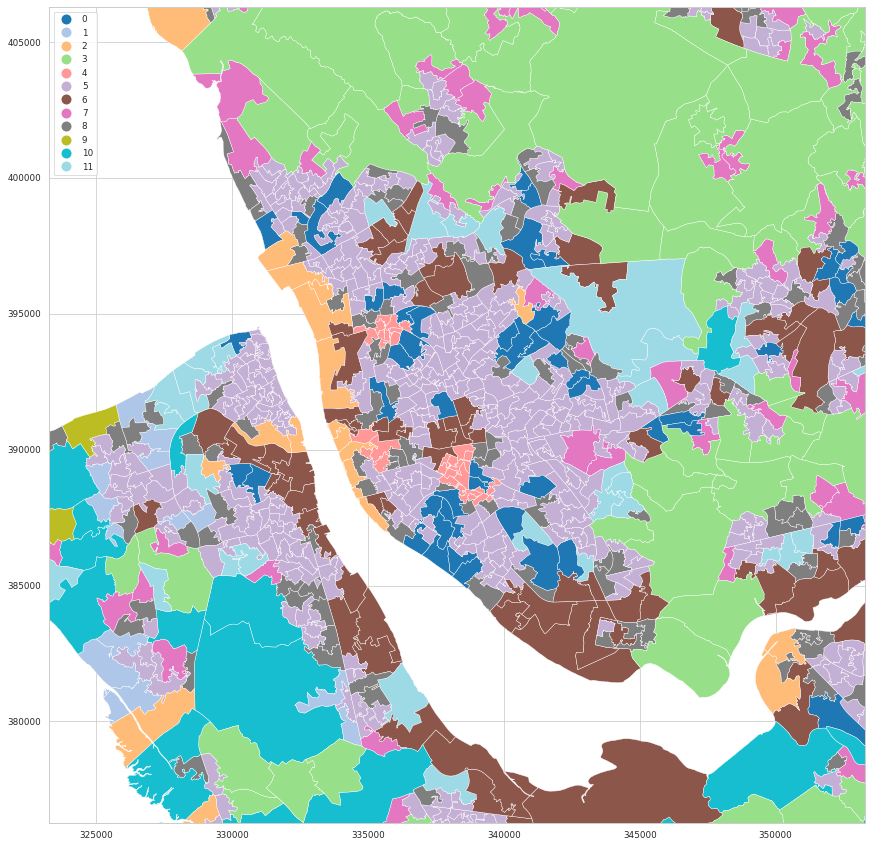

In [19]:
ax = lsoa.plot("clusters_12_2018", categorical=True, figsize=(15, 15), legend=True, alpha=1, cmap='tab20', linewidth=.4, legend_kwds=dict(loc="upper left"))
ax.set_xlim(323275, 353275)
ax.set_ylim(376281, 406281)

In [21]:
lsoa.columns

Index(['OBJECTID', 'LSOA11CD', 'LSOA11NM', 'BNG_E', 'BNG_N', 'LONG_', 'LAT',
       'Shape_Leng', 'Shape__Are', 'Shape__Len', 'clusters_7_2000',
       'clusters_7_2006', 'clusters_7_2012', 'clusters_7_2018',
       'clusters_10_2000', 'clusters_10_2006', 'clusters_10_2012',
       'clusters_10_2018', 'clusters_12_2000', 'clusters_12_2006',
       'clusters_12_2012', 'clusters_12_2018', 'geometry'],
      dtype='object')

In [22]:
lsoa_path = "../../data/lsoa"
lsoa_inp = gpd.read_file(lsoa_path)

In [23]:
lsoa_inp

,OBJECTID,LSOA11CD,LSOA11NM,BNG_E,BNG_N,LONG_,LAT,Shape_Leng,Shape__Are,Shape__Len,geometry
0,1,E01000001,City of London 001A,532123,181632,-0.097140,51.5182,2635.767993,1.298653e+05,2635.767993,"POLYGON ((532151.537 181867.433, 532152.500 18..."
1,2,E01000002,City of London 001B,532480,181715,-0.091970,51.5188,2707.881853,2.284196e+05,2707.881853,"POLYGON ((532634.497 181926.016, 532632.048 18..."
2,3,E01000003,City of London 001C,532239,182033,-0.095320,51.5217,1224.638192,5.905435e+04,1224.638192,"POLYGON ((532153.703 182165.155, 532158.250 18..."
3,4,E01000005,City of London 001E,533581,181283,-0.076270,51.5147,2275.805348,1.895777e+05,2275.805348,"POLYGON ((533619.062 181402.364, 533639.868 18..."
4,5,E01000006,Barking and Dagenham 016A,544994,184274,0.089317,51.5387,1966.092607,1.465370e+05,1966.092607,"POLYGON ((545126.852 184310.838, 545145.213 18..."
...,...,...,...,...,...,...,...,...,...,...,...
34748,34749,W01001954,Cardiff 006F,312959,180574,-3.255820,51.5173,5567.813286,6.400342e+05,5567.813286,"POLYGON ((312747.367 181262.100, 312751.477 18..."
34749,34750,W01001955,Swansea 025F,265633,193182,-3.942370,51.6214,6037.602710,6.871190e+05,6037.602710,"POLYGON ((265804.688 194161.261, 265815.000 19..."
34750,34751,W01001956,Swansea 023E,260586,192621,-4.015000,51.6151,13127.898240,2.500337e+06,13127.898240,"POLYGON ((259961.000 194979.500, 259969.094 19..."
34751,34752,W01001957,Swansea 025G,265337,192555,-3.946400,51.6157,2829.597133,2.139171e+05,2829.597133,"POLYGON ((265154.000 192746.000, 265156.000 19..."


In [27]:
lsoa[['LSOA11CD', 'LSOA11NM', 'clusters_7_2000',
       'clusters_7_2006', 'clusters_7_2012', 'clusters_7_2018',
       'clusters_10_2000', 'clusters_10_2006', 'clusters_10_2012',
       'clusters_10_2018', 'clusters_12_2000', 'clusters_12_2006',
       'clusters_12_2012', 'clusters_12_2018']].to_csv("lsoa_clustered.csv")